In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#Metrics to evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score\
                            ,precision_score,r2_score,roc_auc_score, precision_recall_curve,auc
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score




#for tuning the model
from sklearn.model_selection import GridSearchCV

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### The model I use for this work

In [197]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb

### Explanatory Data Analysis

In [198]:
df = pd.DataFrame(pd.read_excel("Final Loan Data 27Oct_Cleaned.xlsx"))
print(df.shape)

(873, 28)


In [199]:
df.head()

,CV_code,Shop_value,Loan_status,Monthly_invoice_amount,Time_with_company,Historical_default,Invoice_to_shop_value,Person_age,Customer_grade,Overdue_score,...,Default_exceed_30_days,Total_SO,SO_exc_finance_term,SO_exc_finance_term2,SO_exc_finance_term3,Credit_term,Credit_limit,Channel,Customer_type,Zip Code
0,2000007899,200000.0,จ่ายครบ,71125.778333,13.2,Yes,0.355629,NaN,B,1.902439,...,0.0,133.0,14.0,Yes,0.105263,3.0,21000.0,Wet Market,บุคคลธรรมดา,83110
1,2000258191,450000.0,จ่ายครบ,282191.895000,1.6,Yes,0.627093,43.0,B,11.341463,...,0.0,249.0,12.0,Yes,0.048193,3.0,71000.0,Wet Market,บุคคลธรรมดา,18230
2,2000218350,300000.0,จ่ายครบ,299319.500000,3.6,Yes,0.997732,36.0,B+,10.170732,...,0.0,280.0,10.0,Yes,0.035714,3.0,57000.0,Wet Market,บุคคลธรรมดา,16150
3,2000127837,1200000.0,จ่ายครบ,393814.923333,2.2,Yes,0.328179,NaN,B,14.926829,...,0.0,232.0,3.0,Yes,0.012931,3.0,75000.0,Wet Market,บุคคลธรรมดา,38220
4,2000331193,300000.0,จ่ายครบ,311365.706667,0.7,Yes,1.037886,45.0,C,0.769231,...,0.0,180.0,45.0,Yes,0.250000,3.0,57000.0,Wet Market,บุคคลธรรมดา,82110


In [200]:
#Checking unique value
df.nunique()

CV_code                   873
Shop_value                139
Loan_status                 2
Monthly_invoice_amount    871
Time_with_company         110
Historical_default          2
Invoice_to_shop_value     852
Person_age                 55
Customer_grade              8
Overdue_score             311
Total_debt                836
Overdue_outstanding         2
Unpaid_debt               181
Total_invoice             397
Number_of_defaults        149
Default_per_month         732
Defaulttime_per_month      40
Most_default_term           6
Default_exceed_30_days     29
Total_SO                  406
SO_exc_finance_term       167
SO_exc_finance_term2        2
SO_exc_finance_term3      642
Credit_term                 6
Credit_limit              173
Channel                     8
Customer_type               2
Zip Code                  406
dtype: int64

### We got that
- Loan_status is label(1 miss : removed) : 1/0
- CV_code and Zip Code are irrelevant for our model : Drop
- Customer_grade, Most_default_term, Credit_term, Channel are non-numerical factors : One-hot Encoding
- Historical_default, Overdue_outstanding(29 misses), SO_exc_finance_term2(4 misses) and Customer_type(1 miss)  are actually just binary factors : 1/0

In [201]:
df = df.drop(['CV_code', 'Zip Code'], axis=1)
df.shape

(873, 26)

### Check missing value

In [202]:
df.isna().sum()

Shop_value                 20
Loan_status                 1
Monthly_invoice_amount      1
Time_with_company           1
Historical_default          0
Invoice_to_shop_value      20
Person_age                301
Customer_grade              2
Overdue_score               1
Total_debt                 29
Overdue_outstanding        29
Unpaid_debt                 0
Total_invoice               1
Number_of_defaults          1
Default_per_month           1
Defaulttime_per_month       1
Most_default_term           1
Default_exceed_30_days      1
Total_SO                    4
SO_exc_finance_term         4
SO_exc_finance_term2        4
SO_exc_finance_term3        4
Credit_term                 1
Credit_limit                2
Channel                     0
Customer_type               1
dtype: int64

In [203]:
df = df[df['Loan_status'].notna()]
df.shape

(872, 26)

In [204]:
df.head(12)

,Shop_value,Loan_status,Monthly_invoice_amount,Time_with_company,Historical_default,Invoice_to_shop_value,Person_age,Customer_grade,Overdue_score,Total_debt,...,Most_default_term,Default_exceed_30_days,Total_SO,SO_exc_finance_term,SO_exc_finance_term2,SO_exc_finance_term3,Credit_term,Credit_limit,Channel,Customer_type
0,200000.0,จ่ายครบ,71125.778333,13.2,Yes,0.355629,NaN,B,1.902439,14002.96,...,1-3,0.00,133.0,14.0,Yes,0.105263,3.0,21000.0,Wet Market,บุคคลธรรมดา
1,450000.0,จ่ายครบ,282191.895000,1.6,Yes,0.627093,43.0,B,11.341463,5944.66,...,1-3,0.00,249.0,12.0,Yes,0.048193,3.0,71000.0,Wet Market,บุคคลธรรมดา
2,300000.0,จ่ายครบ,299319.500000,3.6,Yes,0.997732,36.0,B+,10.170732,34797.00,...,1-3,0.00,280.0,10.0,Yes,0.035714,3.0,57000.0,Wet Market,บุคคลธรรมดา
3,1200000.0,จ่ายครบ,393814.923333,2.2,Yes,0.328179,NaN,B,14.926829,19495.45,...,1-3,0.00,232.0,3.0,Yes,0.012931,3.0,75000.0,Wet Market,บุคคลธรรมดา
4,300000.0,จ่ายครบ,311365.706667,0.7,Yes,1.037886,45.0,C,0.769231,35632.29,...,1-3,0.00,180.0,45.0,Yes,0.250000,3.0,57000.0,Wet Market,บุคคลธรรมดา
5,400000.0,จ่ายครบ,295420.850000,2.5,Yes,0.738552,64.0,C+,2.195122,12801.48,...,1-3,0.00,482.0,17.0,Yes,0.035270,3.0,75000.0,Wet Market,บุคคลธรรมดา
6,297500.0,จ่ายครบ,244484.333333,3.6,Yes,0.821796,NaN,B+,3.292683,-7089.00,...,1-3,0.00,132.0,1.0,Yes,0.007576,3.0,54000.0,Wet Market,บุคคลธรรมดา
7,300000.0,จ่ายครบ,248798.958333,3.8,No,0.829330,53.0,A,14.341463,12745.00,...,8-14,0.00,153.0,4.0,Yes,0.026144,3.0,45000.0,Wet Market,บุคคลธรรมดา
8,50000.0,ไม่จ่ายครบหรือไม่จ่ายเลย,20664.166667,0.6,Yes,0.413283,NaN,D+,7.700000,2308.75,...,1-3,1.00,56.0,0.0,No,0.000000,1.0,30000.0,Wet Market,บุคคลธรรมดา
9,100000.0,ไม่จ่ายครบหรือไม่จ่ายเลย,11690.750000,3.7,Yes,0.116907,28.0,D+,2.560976,2460.00,...,4-7,0.25,23.0,2.0,Yes,0.086957,5.0,50000.0,ตู้หมู,บุคคลธรรมดา


### Checking the unique value

In [205]:
df["Historical_default"].value_counts()

Yes    810
No      62
Name: Historical_default, dtype: int64

### Converting binary predictors into 1/0

In [206]:
#mapping Loan Status

dict_Loan_status= {'ไม่จ่ายครบหรือไม่จ่ายเลย': 1, 'จ่ายครบ':0}
df['Loan_status'] = df.Loan_status.map(dict_Loan_status)

dict_Historical_default= {'Yes': 1, 'No':0}
df['Historical_default'] = df.Historical_default.map(dict_Historical_default)

dict_SO_exc_finance_term2= {'Yes': 1, 'No':0}
df['SO_exc_finance_term2'] = df.SO_exc_finance_term2.map(dict_SO_exc_finance_term2)

dict_Customer_type= {'บุคคลธรรมดา': 1, 'นิติบุคคล':0}
df['Customer_type'] = df.Customer_type.map(dict_Customer_type)

df.head(12)

,Shop_value,Loan_status,Monthly_invoice_amount,Time_with_company,Historical_default,Invoice_to_shop_value,Person_age,Customer_grade,Overdue_score,Total_debt,...,Most_default_term,Default_exceed_30_days,Total_SO,SO_exc_finance_term,SO_exc_finance_term2,SO_exc_finance_term3,Credit_term,Credit_limit,Channel,Customer_type
0,200000.0,0,71125.778333,13.2,1,0.355629,NaN,B,1.902439,14002.96,...,1-3,0.00,133.0,14.0,1.0,0.105263,3.0,21000.0,Wet Market,1.0
1,450000.0,0,282191.895000,1.6,1,0.627093,43.0,B,11.341463,5944.66,...,1-3,0.00,249.0,12.0,1.0,0.048193,3.0,71000.0,Wet Market,1.0
2,300000.0,0,299319.500000,3.6,1,0.997732,36.0,B+,10.170732,34797.00,...,1-3,0.00,280.0,10.0,1.0,0.035714,3.0,57000.0,Wet Market,1.0
3,1200000.0,0,393814.923333,2.2,1,0.328179,NaN,B,14.926829,19495.45,...,1-3,0.00,232.0,3.0,1.0,0.012931,3.0,75000.0,Wet Market,1.0
4,300000.0,0,311365.706667,0.7,1,1.037886,45.0,C,0.769231,35632.29,...,1-3,0.00,180.0,45.0,1.0,0.250000,3.0,57000.0,Wet Market,1.0
5,400000.0,0,295420.850000,2.5,1,0.738552,64.0,C+,2.195122,12801.48,...,1-3,0.00,482.0,17.0,1.0,0.035270,3.0,75000.0,Wet Market,1.0
6,297500.0,0,244484.333333,3.6,1,0.821796,NaN,B+,3.292683,-7089.00,...,1-3,0.00,132.0,1.0,1.0,0.007576,3.0,54000.0,Wet Market,1.0
7,300000.0,0,248798.958333,3.8,0,0.829330,53.0,A,14.341463,12745.00,...,8-14,0.00,153.0,4.0,1.0,0.026144,3.0,45000.0,Wet Market,1.0
8,50000.0,1,20664.166667,0.6,1,0.413283,NaN,D+,7.700000,2308.75,...,1-3,1.00,56.0,0.0,0.0,0.000000,1.0,30000.0,Wet Market,1.0
9,100000.0,1,11690.750000,3.7,1,0.116907,28.0,D+,2.560976,2460.00,...,4-7,0.25,23.0,2.0,1.0,0.086957,5.0,50000.0,ตู้หมู,1.0


In [207]:
df.describe()

,Shop_value,Loan_status,Monthly_invoice_amount,Time_with_company,Historical_default,Invoice_to_shop_value,Person_age,Overdue_score,Total_debt,Overdue_outstanding,...,Default_per_month,Defaulttime_per_month,Default_exceed_30_days,Total_SO,SO_exc_finance_term,SO_exc_finance_term2,SO_exc_finance_term3,Credit_term,Credit_limit,Customer_type
count,8.530000e+02,872.000000,8.720000e+02,872.000000,872.000000,853.000000,572.000000,872.000000,8.440000e+02,844.000000,...,872.000000,872.000000,872.000000,869.000000,869.000000,869.000000,869.000000,872.000000,871.000000,871.000000
mean,4.442908e+05,0.212156,3.125007e+05,5.110780,0.928899,1078.373568,41.905594,6.760795,2.982118e+04,0.219194,...,0.318221,7.340596,0.227829,214.157652,39.935558,0.812428,0.191121,2.597477,63513.203215,0.982778
std,6.153603e+05,0.409069,6.329864e+05,4.590753,0.257141,15448.009125,11.424380,4.808496,1.174840e+05,0.413946,...,0.320512,8.609386,0.662762,168.760517,72.712080,0.390595,0.236958,0.910277,63502.734109,0.130171
min,1.000000e+00,0.000000,2.462167e+03,0.300000,0.000000,0.008970,5.000000,0.000000,-8.278028e+04,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.500000e+05,0.000000,1.312353e+05,1.675000,1.000000,0.555323,33.000000,2.560976,9.998073e+03,0.000000,...,0.059590,2.000000,0.000000,88.000000,2.000000,1.000000,0.010256,3.000000,30000.000000,1.000000
50%,3.000000e+05,0.000000,2.559051e+05,3.500000,1.000000,0.796986,41.500000,6.000000,1.943615e+04,0.000000,...,0.205193,5.000000,0.000000,195.000000,11.000000,1.000000,0.090395,3.000000,51000.000000,1.000000
75%,5.000000e+05,0.000000,3.964550e+05,8.400000,1.000000,1.012494,50.000000,11.359756,3.220993e+04,0.000000,...,0.467021,10.000000,0.166667,296.000000,51.000000,1.000000,0.293233,3.000000,81000.000000,1.000000
max,1.000000e+07,1.000000,1.753707e+07,14.500000,1.000000,317857.367500,74.000000,15.000000,3.229769e+06,1.000000,...,1.000000,98.000000,10.000000,2123.000000,675.000000,1.000000,1.000000,5.000000,1000000.000000,1.000000


### Questions
- Should we convert Monthly_invoice_amount, Invoice_to_shop_value, Credit_limit into logscale?

In [208]:
corrmap = df.corr()
file_name = 'corrmap.xlsx'
corrmap.to_excel(file_name)


<AxesSubplot:>

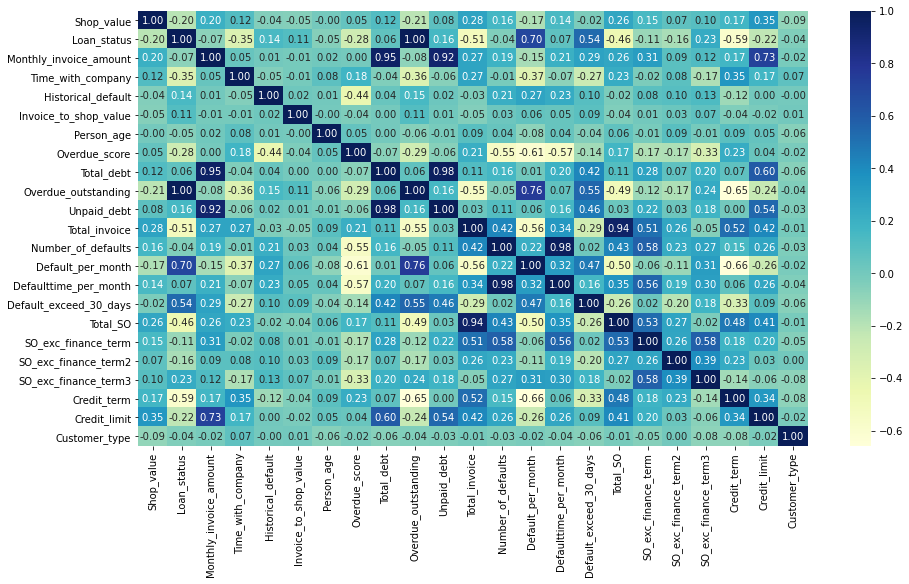

In [209]:
#plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, fmt='0.2f', cmap='YlGnBu')


## Correlation result
### Positively correlated

#### Completely correlated (1) : Overdue_outstanding and Loan_status

#### Extremely positively correlated (0.9+)
- Monthly_invoice_amount ,Total_debt and Unpaid_debt
- Total_invoice and Total_SO
- Number_of_defaults and Defaulttime_per_month

#### Very highly positively correlated (0.65+)
- Loan_status and Default_per_month
- Monthly_invoice_amount and Credit_limit

#### Highly positively correlated (approximately 0.5)
- Overdue_score to Number_of_defaults, Default_per_month and Defaulttime_per_month
- Total_debt and Credit_limit
- Unpaid_debt to Default_exceed_30_days and Credit_limit
- Defaulttime_per_month and SO_exc_finance_term
- Total_SO, SO_exc_finance_term and SO_exc_finance_term3

### Negatively correlated

#### Highly negatively correlated (approximately 0.5)
- Loan_status to Total_invoice, Credit_term and Total_SO
- Overdue_score to Number_of_defaults, Default_per_month and Defaulttime_per_month
- Overdue_outstanding to Total_invoice and Total_SO
- Total_invoice to Default_per_month
- Default_per_month to Total_SO 

#### Very highly negatively correlated (-0.65)
- Credit_term to Default_per_month

#### We removed some of the highly correlated factors
# *** MAY CHANGE LATER WHEN I OBTAINED THE FULL DATA ***

#### Removed the 100% fit

In [210]:
df = df.drop(['Overdue_outstanding',], axis=1)
df.shape

(872, 25)

#### Removing the (very)highly correlated

In [211]:
# Extremely positvely correlated
df = df.drop(['Total_debt','Unpaid_debt','Credit_limit','Total_SO','Defaulttime_per_month'], axis=1)
df.shape

(872, 20)

In [212]:
# Very positvely correlated
df = df.drop(['Default_per_month'], axis=1)
df.shape

(872, 19)

<AxesSubplot:>

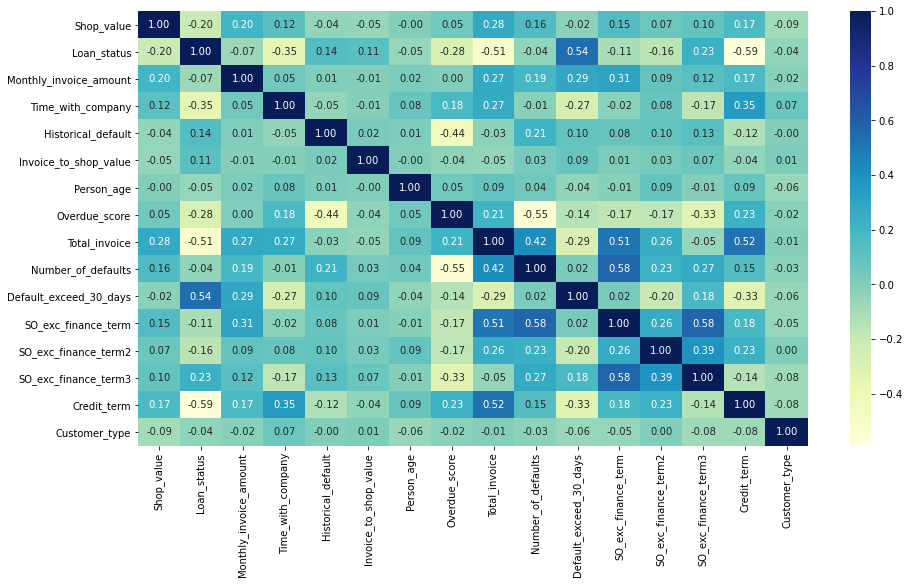

In [213]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, fmt='0.2f', cmap='YlGnBu')


### Checking missing value of remaining columns

In [214]:
print("Columns types")
print(df.nunique())
print("Remaining columns missing values")
print(df.isna().sum())

Columns types
Shop_value                139
Loan_status                 2
Monthly_invoice_amount    871
Time_with_company         110
Historical_default          2
Invoice_to_shop_value     852
Person_age                 55
Customer_grade              8
Overdue_score             311
Total_invoice             397
Number_of_defaults        149
Most_default_term           6
Default_exceed_30_days     29
SO_exc_finance_term       167
SO_exc_finance_term2        2
SO_exc_finance_term3      642
Credit_term                 6
Channel                     7
Customer_type               2
dtype: int64
Remaining columns missing values
Shop_value                 19
Loan_status                 0
Monthly_invoice_amount      0
Time_with_company           0
Historical_default          0
Invoice_to_shop_value      19
Person_age                300
Customer_grade              2
Overdue_score               0
Total_invoice               0
Number_of_defaults          0
Most_default_term           0
Default_ex

<AxesSubplot:xlabel='Person_age', ylabel='Count'>

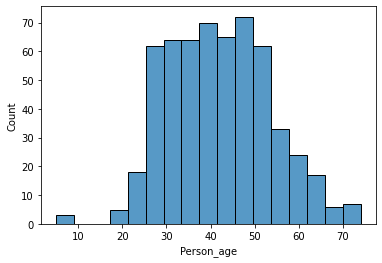

In [215]:
sns.histplot(df['Person_age'])

### Value Imputation

In [216]:
df['Person_age'].describe()

count    572.000000
mean      41.905594
std       11.424380
min        5.000000
25%       33.000000
50%       41.500000
75%       50.000000
max       74.000000
Name: Person_age, dtype: float64

# WILL CHANGE LATER

In [217]:
mean = df['Person_age'].mean()
std = df['Person_age'].std()
# use the mean and standard deviation to generate random numbers from a normal distribution
random_values = np.random.normal(mean, std, size=len(df))

# create a dictionary that maps the missing values in the age column to the generated random values
mask = df['Person_age'].isna()
random_dict = dict(zip(df[mask].index, random_values[mask]))

# use the dictionary to impute the missing values in the age column
df['Person_age'] = df['Person_age'].fillna(value=random_dict)
df['Person_age'] = round(df['Person_age'])
print(df.isna().sum())

Shop_value                19
Loan_status                0
Monthly_invoice_amount     0
Time_with_company          0
Historical_default         0
Invoice_to_shop_value     19
Person_age                 0
Customer_grade             2
Overdue_score              0
Total_invoice              0
Number_of_defaults         0
Most_default_term          0
Default_exceed_30_days     0
SO_exc_finance_term        3
SO_exc_finance_term2       3
SO_exc_finance_term3       3
Credit_term                0
Channel                    0
Customer_type              1
dtype: int64


In [218]:
imputer = SimpleImputer(strategy="most_frequent")
reqd_col_for_impute = ["Shop_value", "Invoice_to_shop_value",'SO_exc_finance_term','SO_exc_finance_term2'
                       ,'SO_exc_finance_term3','Customer_type']
df[reqd_col_for_impute] = imputer.fit_transform(df[reqd_col_for_impute])
print(df.isna().sum())

Shop_value                0
Loan_status               0
Monthly_invoice_amount    0
Time_with_company         0
Historical_default        0
Invoice_to_shop_value     0
Person_age                0
Customer_grade            2
Overdue_score             0
Total_invoice             0
Number_of_defaults        0
Most_default_term         0
Default_exceed_30_days    0
SO_exc_finance_term       0
SO_exc_finance_term2      0
SO_exc_finance_term3      0
Credit_term               0
Channel                   0
Customer_type             0
dtype: int64


In [219]:
df.dtypes

Shop_value                float64
Loan_status                 int64
Monthly_invoice_amount    float64
Time_with_company         float64
Historical_default          int64
Invoice_to_shop_value     float64
Person_age                float64
Customer_grade             object
Overdue_score             float64
Total_invoice             float64
Number_of_defaults        float64
Most_default_term          object
Default_exceed_30_days    float64
SO_exc_finance_term       float64
SO_exc_finance_term2      float64
SO_exc_finance_term3      float64
Credit_term               float64
Channel                    object
Customer_type             float64
dtype: object

### One-hot encoding
Do not get dummies in case of lucky set

## WILL FIX LATER

In [220]:
df.shape

(872, 19)

In [221]:
df = pd.get_dummies(data=df, columns=['Customer_grade', 'Most_default_term','Credit_term','Channel'])

In [222]:
df

,Shop_value,Loan_status,Monthly_invoice_amount,Time_with_company,Historical_default,Invoice_to_shop_value,Person_age,Overdue_score,Total_invoice,Number_of_defaults,...,Credit_term_3.0,Credit_term_4.0,Credit_term_5.0,Channel_IR,Channel_Industry,Channel_Restaurants(ร้านอาหาร),Channel_Wet Market,Channel_ตู้หมู,Channel_ร้านค้าชุมชน,Channel_อื่นๆ
0,200000.0,0,71125.778333,13.2,1,0.355629,52.0,1.902439,145.0,37.0,...,1,0,0,0,0,0,1,0,0,0
1,450000.0,0,282191.895000,1.6,1,0.627093,43.0,11.341463,247.0,10.0,...,1,0,0,0,0,0,1,0,0,0
2,300000.0,0,299319.500000,3.6,1,0.997732,36.0,10.170732,253.0,23.0,...,1,0,0,0,0,0,1,0,0,0
3,1200000.0,0,393814.923333,2.2,1,0.328179,50.0,14.926829,227.0,6.0,...,1,0,0,0,0,0,1,0,0,0
4,300000.0,0,311365.706667,0.7,1,1.037886,45.0,0.769231,168.0,74.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,200000.0,0,221147.200000,13.2,1,1.105736,36.0,6.416667,214.0,50.0,...,1,0,0,0,0,0,1,0,0,0
869,10000.0,1,25577.000000,0.5,1,2.557700,54.0,0.250000,6.0,4.0,...,0,0,0,0,0,0,1,0,0,0
870,800000.0,0,626160.215000,9.6,1,0.782700,40.0,0.731707,431.0,114.0,...,1,0,0,0,0,0,1,0,0,0
871,400000.0,0,284409.900000,3.4,1,0.711025,48.0,5.853659,284.0,39.0,...,1,0,0,0,0,0,1,0,0,0


## 5. Machine Learning models

In [223]:
X = df.drop(['Loan_status'],axis = 1)
y = df['Loan_status']
print(X.shape,y.shape)

(872, 41) (872,)


In [224]:
X_train , X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8 ,random_state = 0)
X_train , X_val, y_train, y_val = train_test_split(X_train,y_train,train_size = 0.75 ,random_state = 0)

In [225]:
print(X_train.shape,X_val.shape,X_test.shape)

(522, 41) (175, 41) (175, 41)


In [226]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features=6,#min_samples_split=80,
                                n_jobs=-1 ,random_state=42,verbose = 0)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_val_pred = rf_clf.predict(X_val)
print("Train score")
print("Precision Recall F1-Scores")
print(precision_recall_fscore_support(y_train, y_train_pred, average='macro'))
print("Accuracy")
print(accuracy_score(y_train, y_train_pred))
print("Validate Score")
print("Precision Recall F1-Scores")
print(precision_recall_fscore_support(y_val, y_val_pred, average='macro'))
print("Accuracy")
print(accuracy_score(y_val, y_val_pred))

Train score
Precision Recall F1-Scores
(1.0, 1.0, 1.0, None)
Accuracy
1.0
Validate Score
Precision Recall F1-Scores
(0.8829787234042553, 0.960431654676259, 0.9131356888227066, None)
Accuracy
0.9371428571428572


In [227]:
y_test_pred = rf_clf.predict(X_test)
print("Test score")
print("Precision Recall F1-Scores")
print(precision_recall_fscore_support(y_test, y_test_pred, average='macro'))
print("Accuracy")
print(accuracy_score(y_test, y_test_pred))


Test score
Precision Recall F1-Scores
(0.8006981382978724, 0.905241935483871, 0.8350301659125189, None)
Accuracy
0.8857142857142857


In [228]:
lgb_clf = lgb.LGBMClassifier(n_estimators=250,learning_rate=0.04,num_leaves = 30)
lgb_clf.fit(X_train, y_train)
y_train_pred = lgb_clf.predict(X_train)
y_val_pred = lgb_clf.predict(X_val)
print("Train score")
print("Precision Recall F1-Scores")
print(precision_recall_fscore_support(y_train, y_train_pred, average='macro'))
print("Accuracy")
print(accuracy_score(y_train, y_train_pred))
print("Validate Score")
print("Precision Recall F1-Scores")
print(precision_recall_fscore_support(y_val, y_val_pred, average='macro'))
print("Accuracy")
print(accuracy_score(y_val, y_val_pred))


Train score
Precision Recall F1-Scores
(1.0, 1.0, 1.0, None)
Accuracy
1.0
Validate Score
Precision Recall F1-Scores
(0.8684341755319149, 0.9429456434852118, 0.8973421776995623, None)
Accuracy
0.9257142857142857


In [229]:
y_test_pred = lgb_clf.predict(X_test)
print("Test score")
print("Precision Recall F1-Scores")
print(precision_recall_fscore_support(y_test, y_test_pred, average='macro'))
print("Accuracy")
print(accuracy_score(y_test, y_test_pred))

Test score
Precision Recall F1-Scores
(0.8074654533198518, 0.9087141577060931, 0.8418248418248417, None)
Accuracy
0.8914285714285715


In [230]:
xgb_clf = XGBClassifier(n_estimators=250, max_depth  =5, learning_rate=0.05)
xgb_clf.fit(X_train, y_train)
y_train_pred = xgb_clf.predict(X_train)
y_val_pred = xgb_clf.predict(X_val)
print("Train score")
print("Precision Recall F1-Scores")
print(precision_recall_fscore_support(y_train, y_train_pred, average='macro'))
print("Accuracy")
print(accuracy_score(y_train, y_train_pred))
print("Validate Score")
print("Precision Recall F1-Scores")
print(precision_recall_fscore_support(y_val, y_val_pred, average='macro'))
print("Accuracy")
print(accuracy_score(y_val, y_val_pred))


Train score
Precision Recall F1-Scores
(1.0, 1.0, 1.0, None)
Accuracy
1.0
Validate Score
Precision Recall F1-Scores
(0.8618132794068082, 0.9290567545963229, 0.8885147433563888, None)
Accuracy
0.92


In [231]:
y_test_pred = xgb_clf.predict(X_test)
print("Test score")
print("Precision Recall F1-Scores")
print(precision_recall_fscore_support(y_test, y_test_pred, average='macro'))
print("Accuracy")
print(accuracy_score(y_test, y_test_pred))

Test score
Precision Recall F1-Scores
(0.8152426861702128, 0.9248431899641577, 0.851527149321267, None)
Accuracy
0.8971428571428571


### Dealing with missing values in binary predictors
SO_exc_finance_term2(4 missing) and Customer_type(1 missing)

Count probability of SO_exc_finance_term2 = 1 when Loan_status = 1 or Loan_status = 0

In [232]:
df.loc[df['Loan_status']==0]

,Shop_value,Loan_status,Monthly_invoice_amount,Time_with_company,Historical_default,Invoice_to_shop_value,Person_age,Overdue_score,Total_invoice,Number_of_defaults,...,Credit_term_3.0,Credit_term_4.0,Credit_term_5.0,Channel_IR,Channel_Industry,Channel_Restaurants(ร้านอาหาร),Channel_Wet Market,Channel_ตู้หมู,Channel_ร้านค้าชุมชน,Channel_อื่นๆ
0,200000.0,0,71125.778333,13.2,1,0.355629,52.0,1.902439,145.0,37.0,...,1,0,0,0,0,0,1,0,0,0
1,450000.0,0,282191.895000,1.6,1,0.627093,43.0,11.341463,247.0,10.0,...,1,0,0,0,0,0,1,0,0,0
2,300000.0,0,299319.500000,3.6,1,0.997732,36.0,10.170732,253.0,23.0,...,1,0,0,0,0,0,1,0,0,0
3,1200000.0,0,393814.923333,2.2,1,0.328179,50.0,14.926829,227.0,6.0,...,1,0,0,0,0,0,1,0,0,0
4,300000.0,0,311365.706667,0.7,1,1.037886,45.0,0.769231,168.0,74.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,300000.0,0,256475.000000,3.6,0,0.854917,54.0,14.414634,179.0,0.0,...,1,0,0,0,0,0,1,0,0,0
868,200000.0,0,221147.200000,13.2,1,1.105736,36.0,6.416667,214.0,50.0,...,1,0,0,0,0,0,1,0,0,0
870,800000.0,0,626160.215000,9.6,1,0.782700,40.0,0.731707,431.0,114.0,...,1,0,0,0,0,0,1,0,0,0
871,400000.0,0,284409.900000,3.4,1,0.711025,48.0,5.853659,284.0,39.0,...,1,0,0,0,0,0,1,0,0,0


In [233]:
df.loc[(df['Loan_status']==0) & (df['Customer_type']==1)]

,Shop_value,Loan_status,Monthly_invoice_amount,Time_with_company,Historical_default,Invoice_to_shop_value,Person_age,Overdue_score,Total_invoice,Number_of_defaults,...,Credit_term_3.0,Credit_term_4.0,Credit_term_5.0,Channel_IR,Channel_Industry,Channel_Restaurants(ร้านอาหาร),Channel_Wet Market,Channel_ตู้หมู,Channel_ร้านค้าชุมชน,Channel_อื่นๆ
0,200000.0,0,71125.778333,13.2,1,0.355629,52.0,1.902439,145.0,37.0,...,1,0,0,0,0,0,1,0,0,0
1,450000.0,0,282191.895000,1.6,1,0.627093,43.0,11.341463,247.0,10.0,...,1,0,0,0,0,0,1,0,0,0
2,300000.0,0,299319.500000,3.6,1,0.997732,36.0,10.170732,253.0,23.0,...,1,0,0,0,0,0,1,0,0,0
3,1200000.0,0,393814.923333,2.2,1,0.328179,50.0,14.926829,227.0,6.0,...,1,0,0,0,0,0,1,0,0,0
4,300000.0,0,311365.706667,0.7,1,1.037886,45.0,0.769231,168.0,74.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,300000.0,0,256475.000000,3.6,0,0.854917,54.0,14.414634,179.0,0.0,...,1,0,0,0,0,0,1,0,0,0
868,200000.0,0,221147.200000,13.2,1,1.105736,36.0,6.416667,214.0,50.0,...,1,0,0,0,0,0,1,0,0,0
870,800000.0,0,626160.215000,9.6,1,0.782700,40.0,0.731707,431.0,114.0,...,1,0,0,0,0,0,1,0,0,0
871,400000.0,0,284409.900000,3.4,1,0.711025,48.0,5.853659,284.0,39.0,...,1,0,0,0,0,0,1,0,0,0


In [234]:
#Continue here
len(df.loc[(df['Loan_status']==0) & (df['SO_exc_finance_term2']==0)])/len(df.loc[(df['Loan_status']==0)])
len(df.loc[(df['Loan_status']==1) & (df['Customer_type']==1)])/len(df.loc[(df['Loan_status']==1)])


0.972972972972973

### Using label to guess the predictor
## NOTE : DO NOT RUN THIS IN ACTUAL PRODUCTION
- Finding prob of Overdue_outstanding = 1 given label = 1
- Finding prob of Overdue_outstanding = 0 given label = 1

In [235]:
len(df[df['Loan_status']==1])

185